In [117]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
data = pd.read_csv('./data_files/fraud_oracle.csv')
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [119]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [120]:
data.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

#### Missing Values

In [121]:
data.isna().any().any()

False

In [122]:
month_plot = data.groupby('Month').count().sort_values(by='MonthClaimed').reset_index()

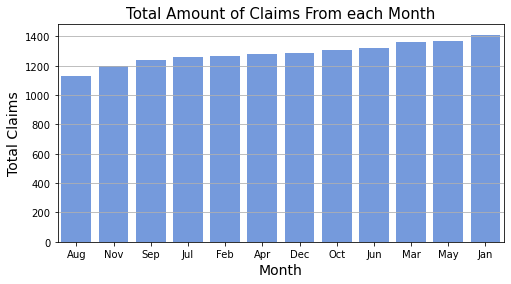

In [123]:
plt.figure(figsize=(8,4))
plt.title('Total Amount of Claims From each Month', fontsize=15)
sns.barplot(month_plot['Month'], month_plot['MonthClaimed'], color='cornflowerblue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Claims', fontsize=14)
plt.grid(axis='y')
plt.show()

In [124]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [125]:
data['AgeOfPolicyHolder'].value_counts()

31 to 35    5593
36 to 40    4043
41 to 50    2828
51 to 65    1392
26 to 30     613
over 65      508
16 to 17     320
21 to 25     108
18 to 20      15
Name: AgeOfPolicyHolder, dtype: int64

In [126]:
age_plot= data.groupby('AgeOfPolicyHolder').count().reset_index()

In [127]:
age_plot

,AgeOfPolicyHolder,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,...,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,16 to 17,320,320,320,320,320,320,320,320,320,...,320,320,320,320,320,320,320,320,320,320
1,18 to 20,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
2,21 to 25,108,108,108,108,108,108,108,108,108,...,108,108,108,108,108,108,108,108,108,108
3,26 to 30,613,613,613,613,613,613,613,613,613,...,613,613,613,613,613,613,613,613,613,613
4,31 to 35,5593,5593,5593,5593,5593,5593,5593,5593,5593,...,5593,5593,5593,5593,5593,5593,5593,5593,5593,5593
5,36 to 40,4043,4043,4043,4043,4043,4043,4043,4043,4043,...,4043,4043,4043,4043,4043,4043,4043,4043,4043,4043
6,41 to 50,2828,2828,2828,2828,2828,2828,2828,2828,2828,...,2828,2828,2828,2828,2828,2828,2828,2828,2828,2828
7,51 to 65,1392,1392,1392,1392,1392,1392,1392,1392,1392,...,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392
8,over 65,508,508,508,508,508,508,508,508,508,...,508,508,508,508,508,508,508,508,508,508


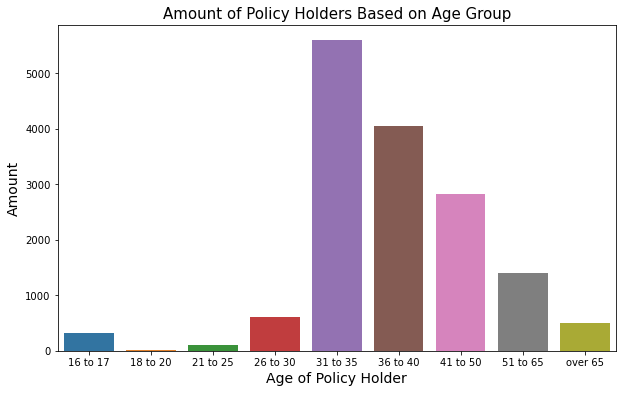

In [128]:
plt.figure(figsize=(10,6))
sns.barplot(age_plot['AgeOfPolicyHolder'], age_plot['MonthClaimed'])
plt.xlabel('Age of Policy Holder', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.title('Amount of Policy Holders Based on Age Group', fontsize=15)
plt.show()

In [129]:
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [130]:
fraud_count = data.groupby(['FraudFound_P', 'Month','Year']).count().reset_index()

In [131]:
fraud_count = fraud_count[fraud_count['FraudFound_P'] == 1]
fraud_count

,FraudFound_P,Month,Year,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
36,1,Apr,1994,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
37,1,Apr,1995,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
38,1,Apr,1996,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
39,1,Aug,1994,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56
40,1,Aug,1995,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
41,1,Aug,1996,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
42,1,Dec,1994,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
43,1,Dec,1995,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
44,1,Dec,1996,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
45,1,Feb,1994,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36


Text(0, 0.5, 'Fraud Count')

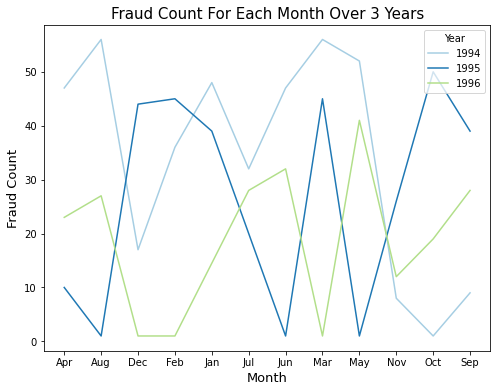

In [132]:
plt.figure(figsize=(8,6))
sns.lineplot(fraud_count['Month'], fraud_count['DayOfWeek'], hue=fraud_count['Year'], palette='Paired')
plt.title('Fraud Count For Each Month Over 3 Years', fontsize=15)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Fraud Count', fontsize=13)

### Correlation Plot

<AxesSubplot:>

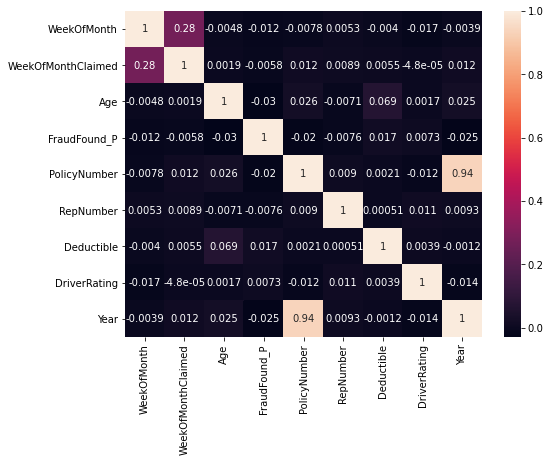

In [133]:
corr_plot = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_plot, annot=True,)

In [134]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [135]:
reports = data.groupby(['PoliceReportFiled','WitnessPresent']).count().reset_index()
reports

,PoliceReportFiled,WitnessPresent,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,...,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,No,No,14945,14945,14945,14945,14945,14945,14945,14945,...,14945,14945,14945,14945,14945,14945,14945,14945,14945,14945
1,No,Yes,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
2,Yes,No,388,388,388,388,388,388,388,388,...,388,388,388,388,388,388,388,388,388,388
3,Yes,Yes,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40


In [136]:
ReportYes = reports[reports['PoliceReportFiled'] == 'Yes']

In [137]:
ReportNo = reports[reports['PoliceReportFiled'] == 'No']

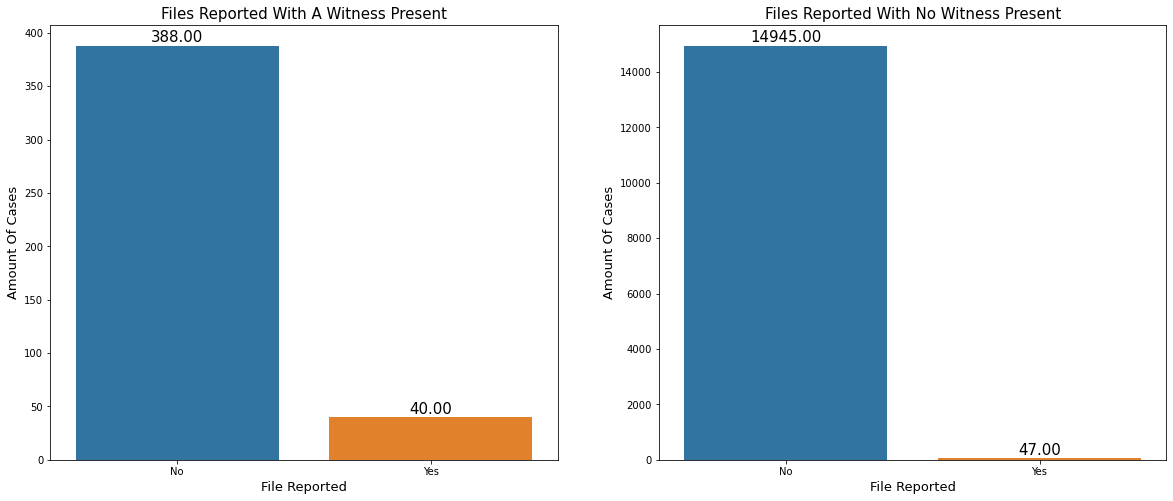

I'ts more likley that there wont be a witness present. Howerver, 7 more files were reported without a witness present. 
In most cases no file will be reported regardless of a witness.


In [138]:
fig , ax = plt.subplots(1,2, figsize=(20,8))



plot1 =sns.barplot('WitnessPresent', 'Month', data = ReportYes, ax=ax[0])
plot1.set_xlabel('File Reported', fontsize=13)
plot1.set_ylabel('Amount Of Cases', fontsize=13)
plot1.set_title('Files Reported With A Witness Present', fontsize=15)
for bar in plot1.patches:
    plot1.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')


plot2 =sns.barplot('WitnessPresent', 'Month', data = ReportNo, ax=ax[1])
plot2.set_xlabel('File Reported', fontsize=13)
plot2.set_ylabel('Amount Of Cases', fontsize=13)
plot2.set_title('Files Reported With No Witness Present', fontsize=15)
for bar in plot2.patches:
    plot2.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')

plt.show()
print("""I'ts more likley that there wont be a witness present. Howerver, 7 more files were reported without a witness present. 
In most cases no file will be reported regardless of a witness.""")